In [21]:
#import all necessary libraries for ML and Classification tasks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sk Learn classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score



from sklearn.neighbors import KNeighborsClassifier

#cross validation
from sklearn.model_selection import cross_val_score




#LDA, QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#grid search
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')




In [5]:
data = pd.read_csv('rice_train.csv')
print("Length of data: ", len(data))
#number of columns
print("Number of columns: ", len(data.columns))
print("Columns: ", data.columns)
#print the null values


Length of data:  2810
Number of columns:  8
Columns:  Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')


In [7]:
print("Null values: ", data.isnull().sum())
#print the data types

print("Data types: ", data.dtypes)
#print the statistical analysis of the data



Null values:  Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64
Data types:  Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area            int64
Extent               float64
Class                  int64
dtype: object


In [9]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000
mean,12657.261210,454.091789,188.703552,86.275986,0.886922,12942.640569,0.662046,1.574733
std,1730.174625,35.509107,17.380151,5.745615,0.020648,1775.288198,0.077102,0.494471
min,7551.000000,359.100006,145.264465,59.532406,0.800538,7723.000000,0.497413,1.000000
25%,11358.250000,426.228241,174.379562,82.679905,0.872402,11610.500000,0.599141,1.000000
50%,12432.500000,448.808502,185.652931,86.494820,0.889193,12720.500000,0.645538,2.000000
75%,13948.250000,483.657242,203.409973,90.111046,0.902522,14287.000000,0.726126,2.000000
max,17948.000000,548.445984,239.010498,107.542450,0.945059,18322.000000,0.861050,2.000000


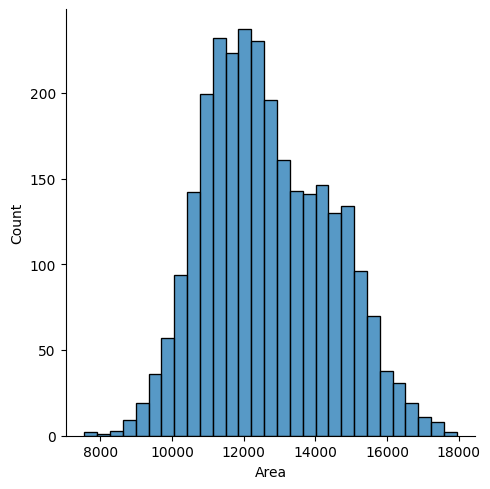

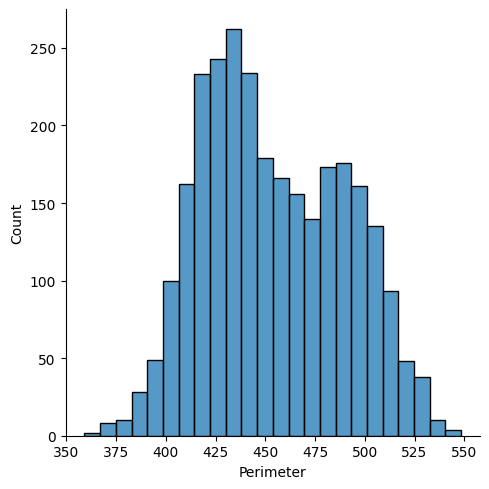

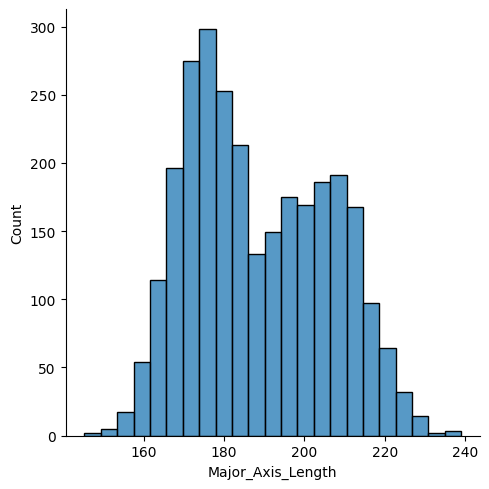

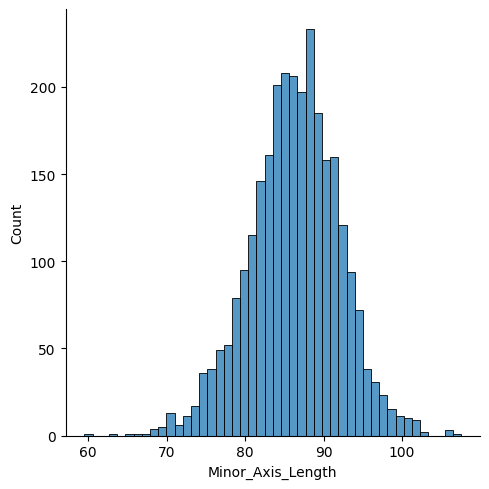

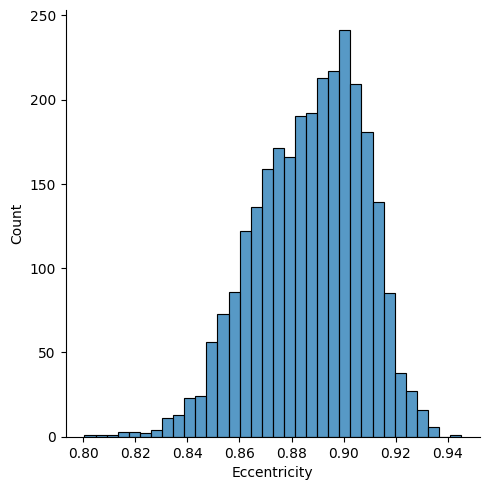

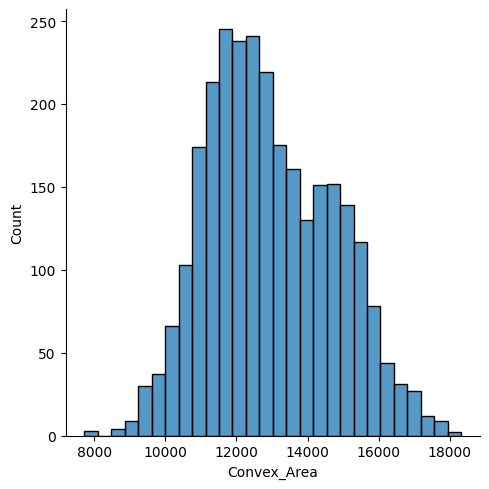

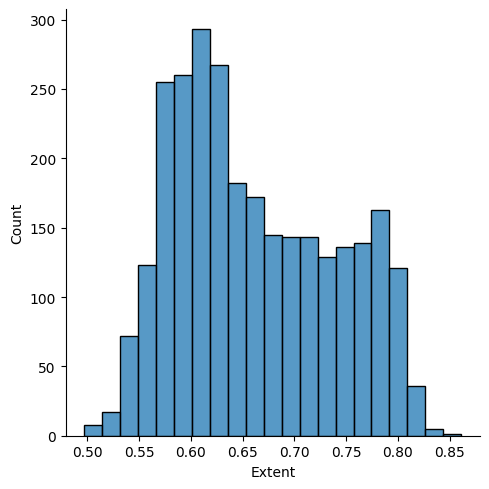

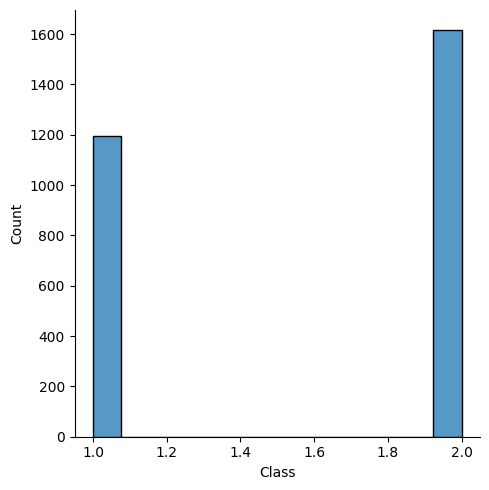

In [11]:
for i in data.columns:
    sns.displot(data[i])
    plt.show()

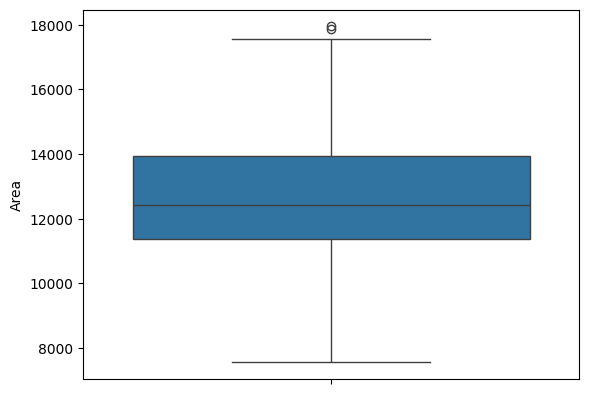

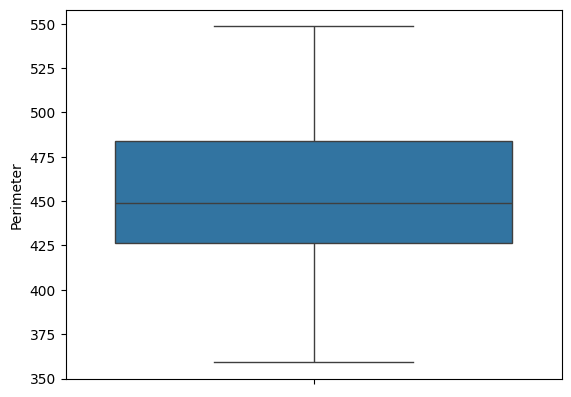

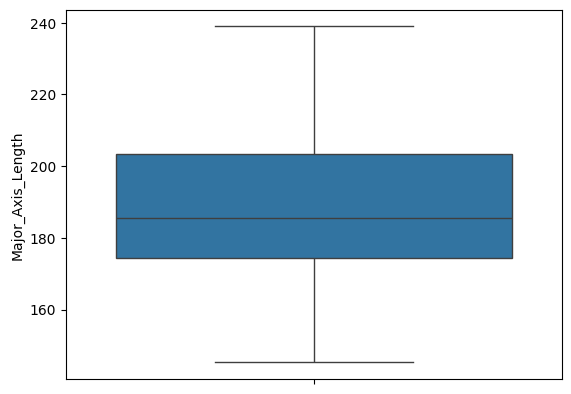

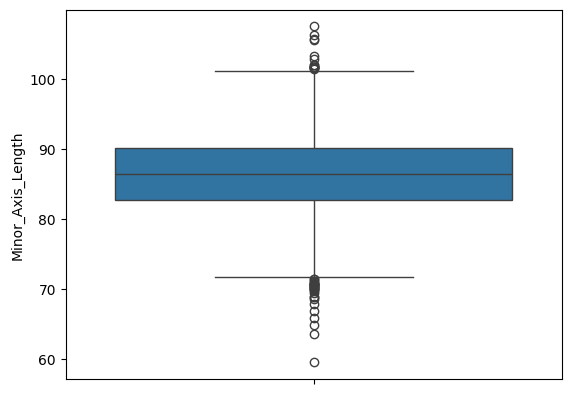

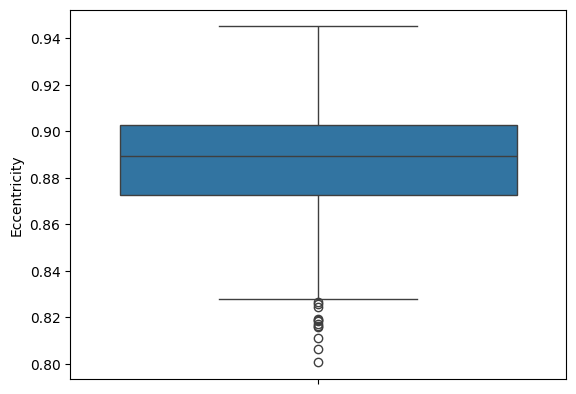

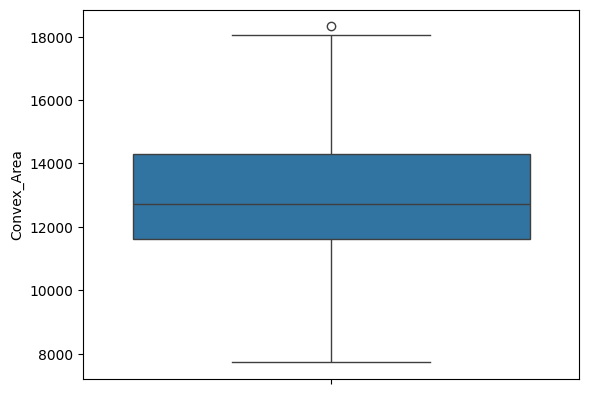

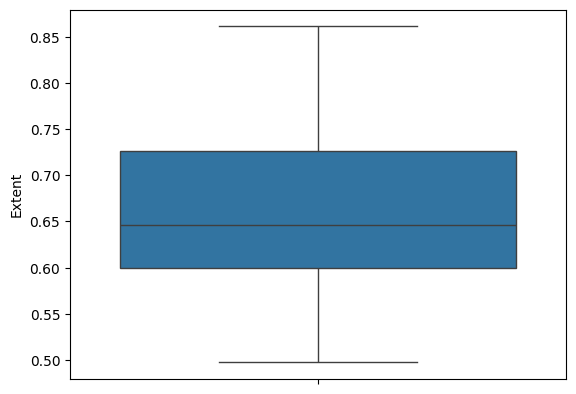

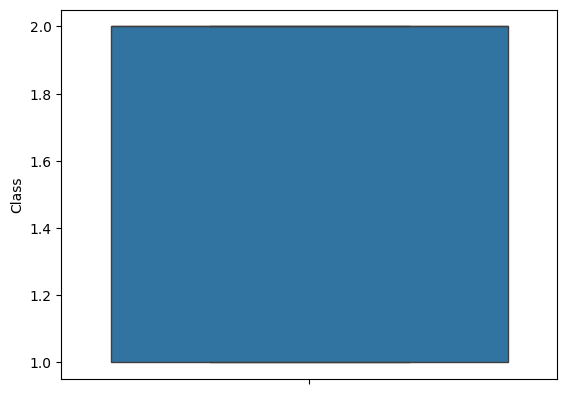

In [12]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

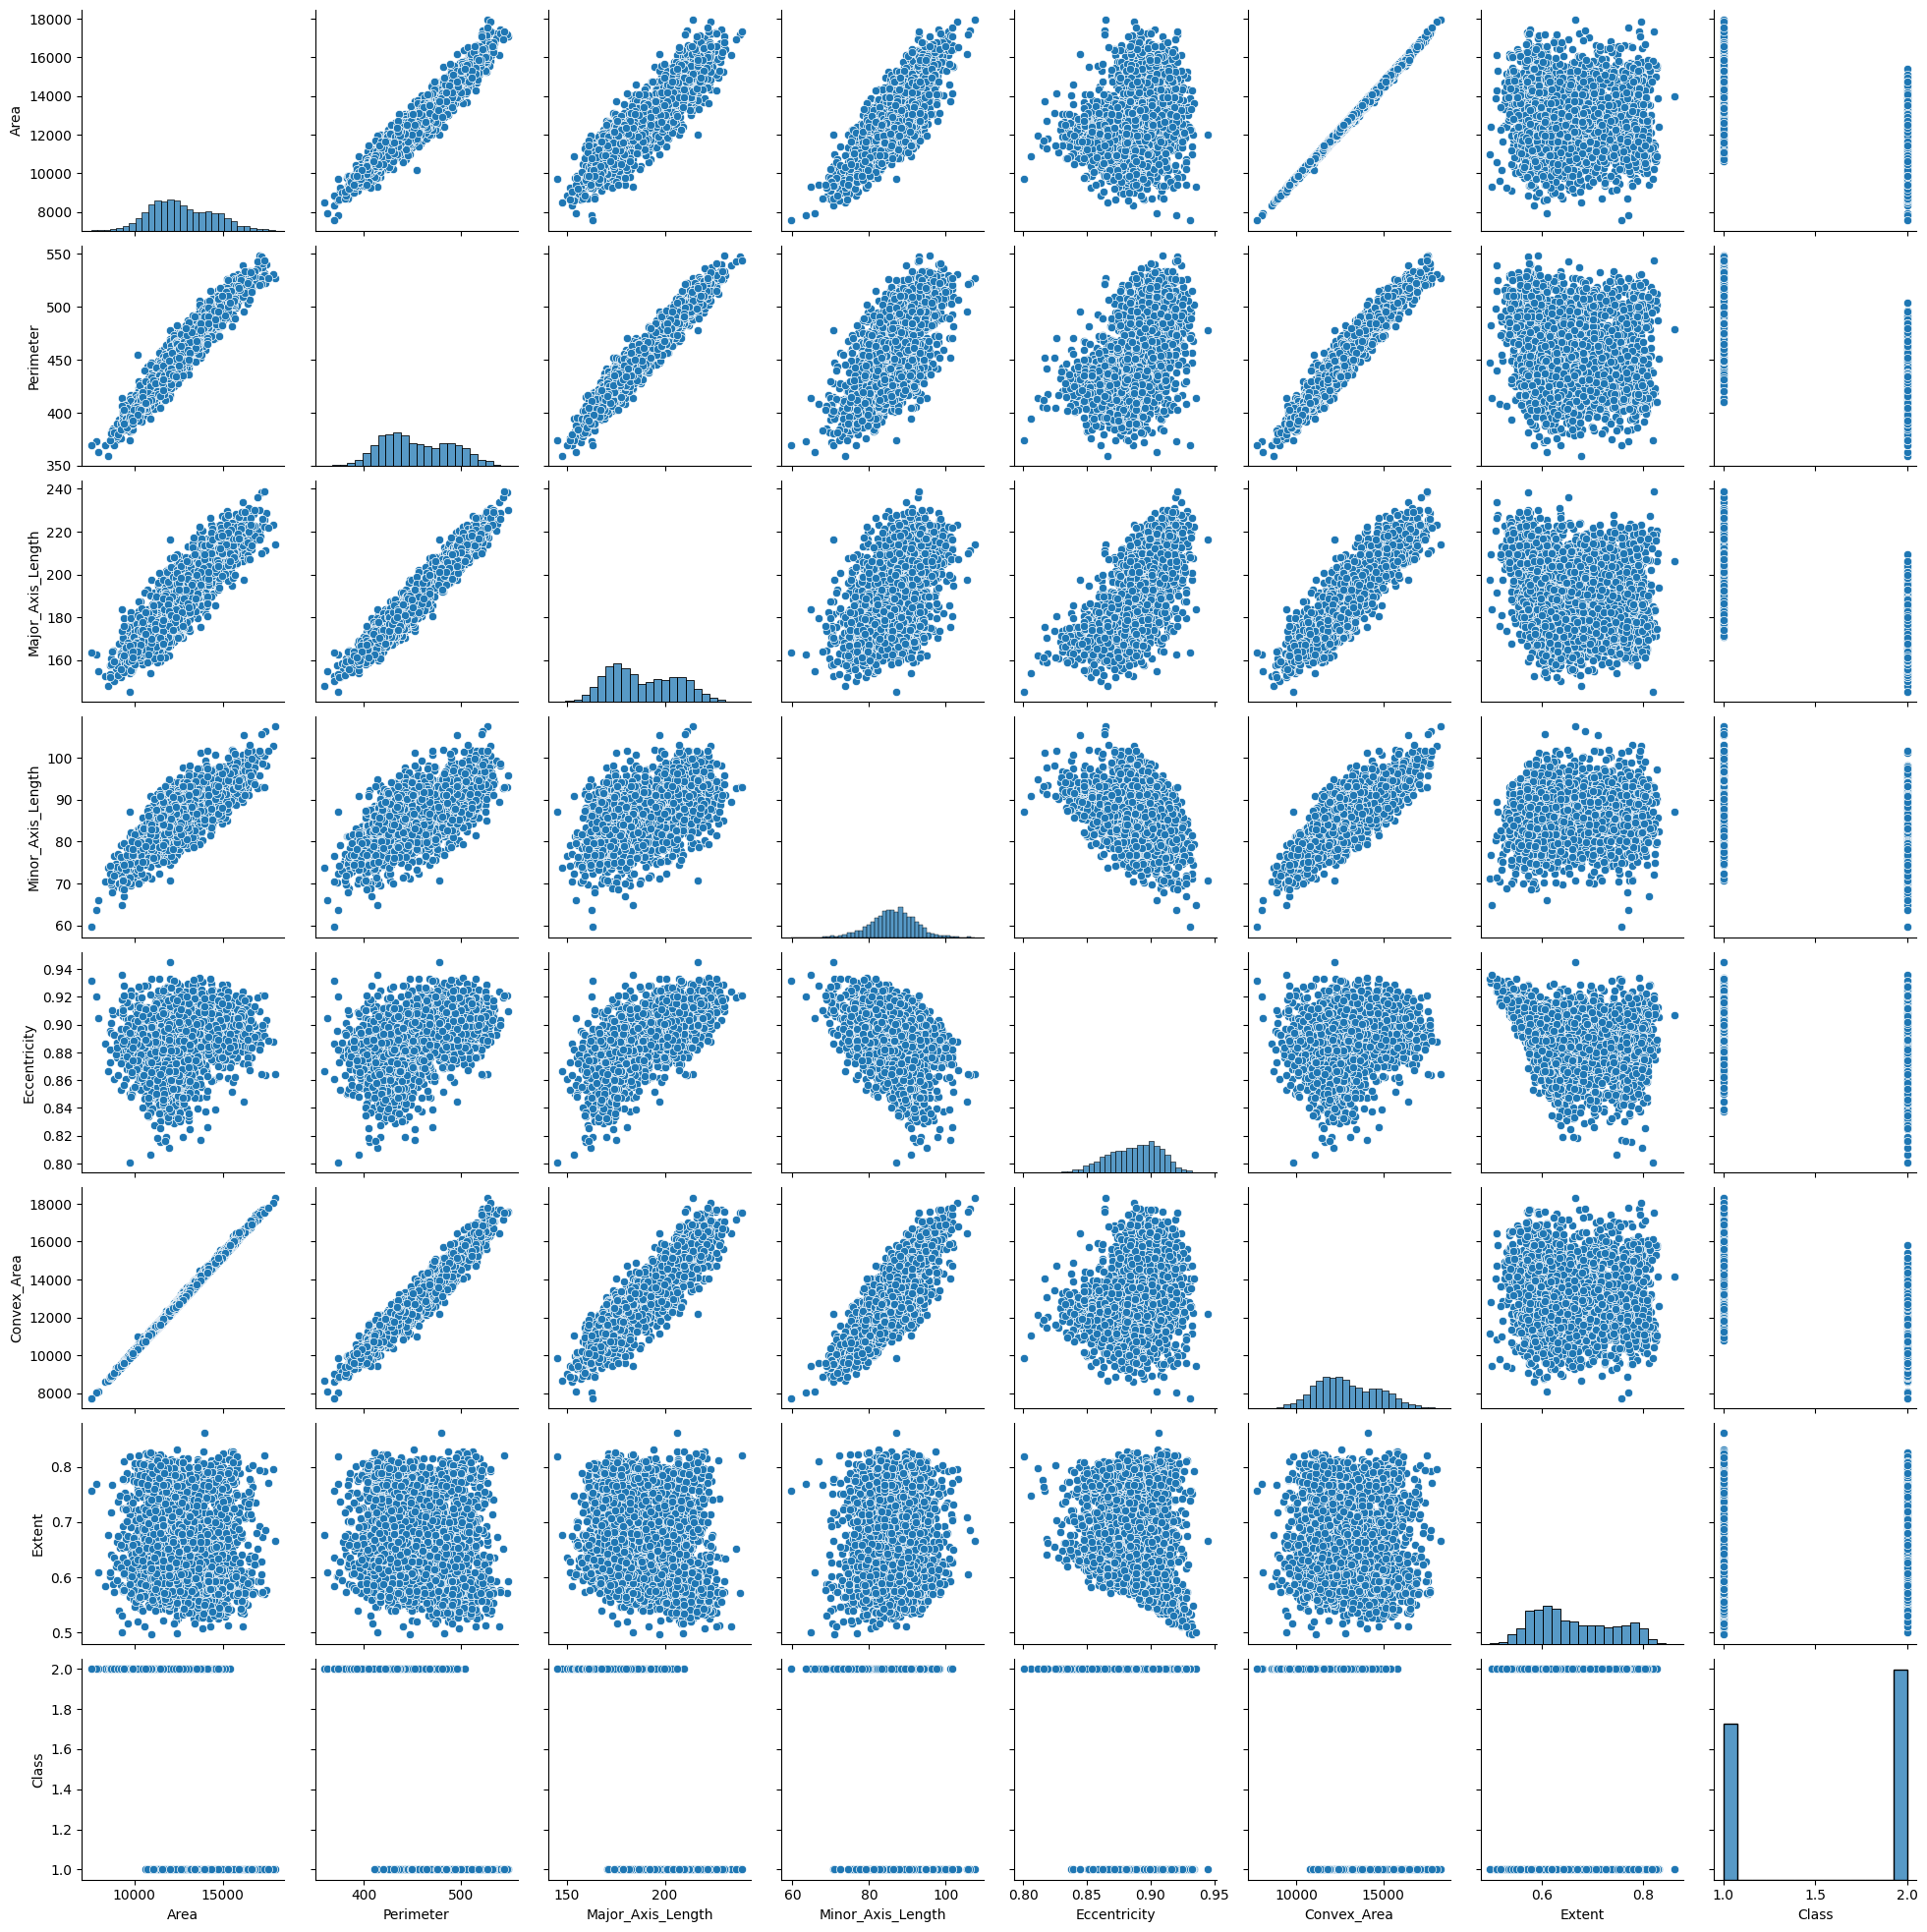

In [13]:
sns.pairplot(data)
plt.show()

In [46]:
data = pd.read_csv("rice_train.csv")
target = data["Class"]
data = data.drop("Class", axis=1)
data = data.drop("Extent", axis=1)
data = data.drop("Convex_Area", axis=1)



#data["product1"] =  data["Eccentricity"] / data["Area"]
#scale features
#scaler = StandardScaler()

#data = scaler.fit_transform(data)



#train test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)


def classification(X_train, X_test, y_train, y_test):
    """Implement Logistic Regression, LDA, QDA, and perform GridSearchCV for KNN to find the optimal k."""
    models = {
        'Logistic Regression': LogisticRegression(),
        'LDA': LinearDiscriminantAnalysis(),
        'QDA': QuadraticDiscriminantAnalysis()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {results[name]:.2f}")
        print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Grid search for KNN
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': range(1, 21)}
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print("Best parameters for KNN:", grid_search.best_params_)
    print("Best cross-validation score for KNN: {:.2f}".format(grid_search.best_score_))

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    print("KNN Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("KNN Classification Report:\n", classification_report(y_test, y_pred))

    return models['Logistic Regression']

model = classification(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy: 0.94
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.92      0.93       243
           2       0.94      0.95      0.94       319

    accuracy                           0.94       562
   macro avg       0.94      0.93      0.93       562
weighted avg       0.94      0.94      0.94       562

LDA Accuracy: 0.94
LDA Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93       243
           2       0.93      0.96      0.95       319

    accuracy                           0.94       562
   macro avg       0.94      0.93      0.94       562
weighted avg       0.94      0.94      0.94       562

QDA Accuracy: 0.91
QDA Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       243
           2       0.94      0.91      0.92       319

    accuracy

In [39]:

def tune_logistic_regression(X_train, y_train):
   
    model = LogisticRegression()

    # Define the hyperparameter grid
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'], 
        'max_iter': [100, 200, 300, 400, 500, 1000]
    }

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_

# Assuming X_train and y_train are already defined and are the training datasets
best_lr_model = tune_logistic_regression(X_train, y_train)

# Predict on the test set
y_pred = best_lr_model.predict(X_test)

# Print the classification report
print("Logistic Regression Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))




Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 1, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.93
Logistic Regression Test Accuracy: 0.93
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [40]:
#tune lda model
def tune_lda(X_train, y_train):
    model = LinearDiscriminantAnalysis()

    # Define the hyperparameter grid
    param_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': ['auto', None],
        'n_components': [None, 1, 2, 3, 4],
        'tol': [1.0e-4, 1.0e-3, 1.0e-2],
        'store_covariance': [True, False],
        'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
        
        
    }

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_

best_lda_model = tune_lda(X_train, y_train)

# Predict on the test set
y_pred = best_lda_model.predict(X_test)

# Print the classification report
print("LDA Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("LDA Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best parameters: {'n_components': None, 'priors': [0.4, 0.6], 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
Best cross-validation score: 0.93
LDA Test Accuracy: 0.97
LDA Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29



In [41]:
#tune qda
def tune_qda(X_train, y_train):
    model = QuadraticDiscriminantAnalysis()

    # Define the hyperparameter grid
    param_grid = {
        'reg_param':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'store_covariance': [True, False],
        'tol': [0.0001, 0.001, 0.01, 0.1],
    }

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_

best_qda_model = tune_qda(X_train, y_train)

# Predict on the test set
y_pred = best_qda_model.predict(X_test)

# Print the classification report
print("QDA Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("QDA Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'reg_param': 0.2, 'store_covariance': True, 'tol': 0.0001}
Best cross-validation score: 0.93
QDA Test Accuracy: 0.93
QDA Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        16

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [35]:
test = pd.read_csv("rice_test.csv")
test = test.drop("Extent", axis=1)
test = test.drop("Convex_Area", axis=1)


predictions = best_lda_model.predict(test)

#save on a one txt
np.savetxt("predictionslda-01-ex.txt", predictions, fmt="%s")

In [47]:
#read val.csv file
val = pd.read_csv("val.csv")
val = val.drop("Extent", axis=1)
val = val.drop("Convex_Area", axis=1)

#check all the models on the val, and print the accuracy
models = {
    'Logistic Regression': model,
    'LDA': best_lda_model,
    'QDA': best_qda_model
}

for name, model in models.items():
    y_pred = model.predict(val.drop("Class", axis=1))
    print(f"{name} Validation Accuracy: {accuracy_score(val['Class'], y_pred):.2f}")
    print(f"{name} Validation Classification Report:\n{classification_report(val['Class'], y_pred)}")
    
    


Logistic Regression Validation Accuracy: 0.93
Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.91      0.92       434
           2       0.93      0.94      0.94       564

    accuracy                           0.93       998
   macro avg       0.93      0.93      0.93       998
weighted avg       0.93      0.93      0.93       998

LDA Validation Accuracy: 0.92
LDA Validation Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.89      0.91       434
           2       0.92      0.95      0.93       564

    accuracy                           0.92       998
   macro avg       0.92      0.92      0.92       998
weighted avg       0.92      0.92      0.92       998

QDA Validation Accuracy: 0.93
QDA Validation Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.91      0.92       434
 

XGBoost Test Accuracy: 0.93
XGBoost Validation Accuracy: 0.92
